# 🚢 Titanic Dataset Analysis

This notebook analyzes the Titanic dataset to explore survival patterns by age, embarkation port, and family size, along with visualizations.

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd

data = pd.read_csv("Titanic-Dataset.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Cleaning

### Check for Missing Values

In [2]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Fill Missing Ages with Mean Age

In [3]:
df.fillna(df['Age'].mean().round(), inplace=True)

### Drop Cabin Column (too many missing values)

In [4]:
df.drop(['Cabin'], axis=1, inplace=True)

## 3. Feature Engineering

### Age Groups
We categorize passengers into meaningful age groups.

In [5]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child (0-12)", "Teen (13-18)", "Young Adult (19-30)", "Adult (31-50)", "Senior (51+)"]

df["Agegroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

### Survival Rate by Age Group

In [6]:
survived_by_age = df.groupby('Agegroup', observed=True)['Survived'].mean() * 100
survived_by_age

Agegroup
Child (0-12)           57.971014
Teen (13-18)           42.857143
Young Adult (19-30)    33.109620
Adult (31-50)          42.323651
Senior (51+)           34.375000
Name: Survived, dtype: float64

## 4. Exploratory Analysis

### Survival Rate by Embarkation Port

In [7]:
embarktion = df.groupby('Embarked', observed=True)['Survived'].mean() * 100
embarktion

Embarked
30.0    100.000000
C        55.357143
Q        38.961039
S        33.695652
Name: Survived, dtype: float64

### Survival Rate by Family Size
We define family size as **siblings/spouses + parents/children**.

In [8]:
family_size = df['SibSp'] + df['Parch']
family = df.groupby(family_size)['Survived'].mean() * 100
family

0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

## 5. Visualizations

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

### 📊 Age Distribution

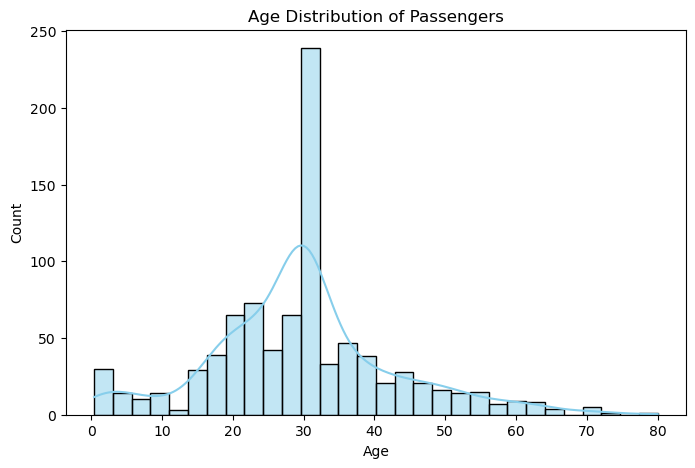

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### 🔥 Correlation Heatmap

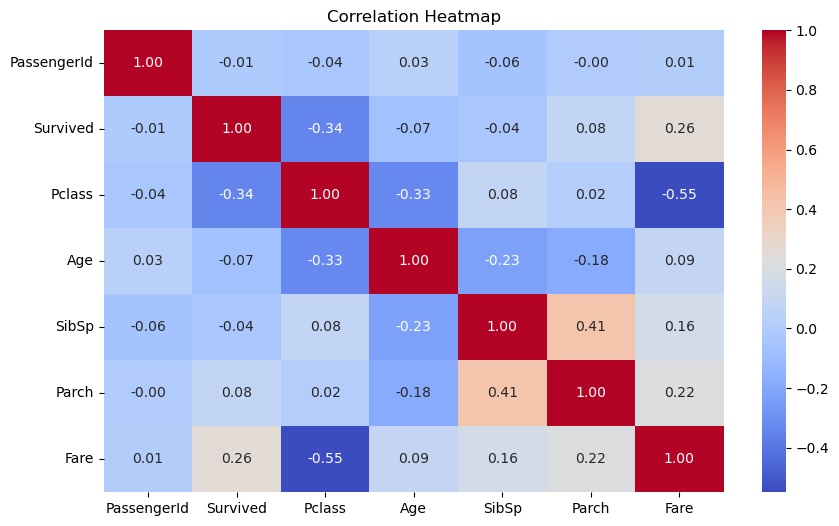

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 👨‍👩‍👧 Survival by Family Size

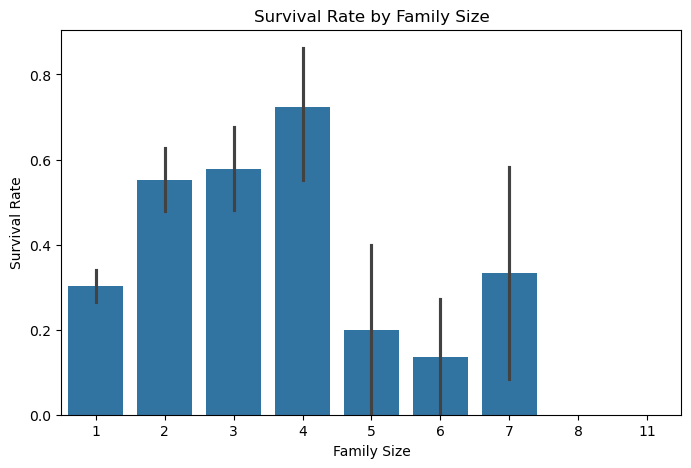

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()